In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data1 = pd.read_csv('deliveries.csv')
data1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
data1.drop(['player_dismissed','dismissal_kind','fielder'],axis=1)
data1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [5]:
data2 = pd.read_csv('matches.csv')
data2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
data2.drop(['umpire3'],axis=1,inplace=True)
data2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


# handling null values and cleaning the data

In [8]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

In [9]:
data2.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [10]:
data2['city'].mode()
data2['city'].fillna('Mumbai',inplace=True)
data2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [11]:
data2['winner'].mode()
data2['winner'].fillna('Mumbai Indians',inplace=True)
data2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [12]:
data2['player_of_match'].mode()
data2['player_of_match'].fillna('CH Gayle',inplace=True)
data2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

In [13]:
data2['umpire1'].mode()
data2['umpire1'].fillna('HDPK Dharmasena ',inplace=True)
data2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            2
dtype: int64

In [14]:
data2['umpire2'].mode()
data2['umpire2'].fillna('C Shamshuddin ',inplace=True)
data2.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

# EDA 

<AxesSubplot:>

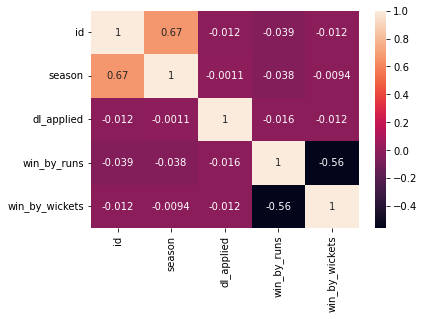

In [15]:
import seaborn as sns
ax = sns.heatmap(data2.corr(), annot=True)
ax

<AxesSubplot:>

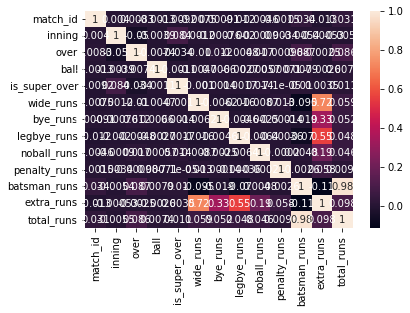

In [16]:
ax = sns.heatmap(data1.corr(), annot=True)
ax

In [17]:
w = pd.DataFrame(data2['winner'].unique())
w

,0
0,Sunrisers Hyderabad
1,Rising Pune Supergiant
2,Kolkata Knight Riders
3,Kings XI Punjab
4,Royal Challengers Bangalore
5,Mumbai Indians
6,Delhi Daredevils
7,Gujarat Lions
8,Chennai Super Kings
9,Rajasthan Royals


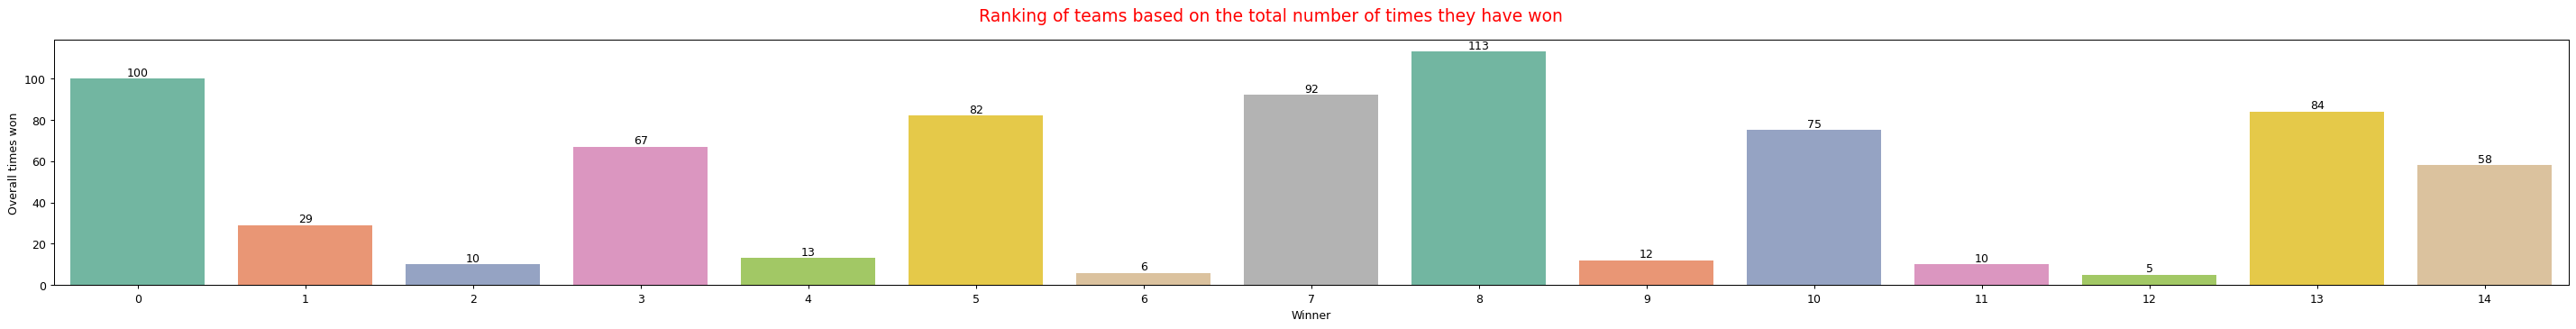

In [60]:
x1=pd.DataFrame(data2.groupby(['winner'])['id'].count())
x2=pd.DataFrame(data2.groupby(['winner'])['win_by_runs'].mean())
X =pd.concat([x1,x2], axis=1)
X = X.reset_index()
X
winner = X['winner']
X
fig, ax = plt.subplots(figsize=(40,4), dpi=90)
sns.barplot(x='winner',y='id',data=X,palette="Set2")
plt.xlabel('Winner')
plt.ylabel('Overall times won')
ax.bar_label(ax.containers[0])

fig.suptitle('Ranking of teams based on the total number of times they have won', fontsize=15, color = 'red');

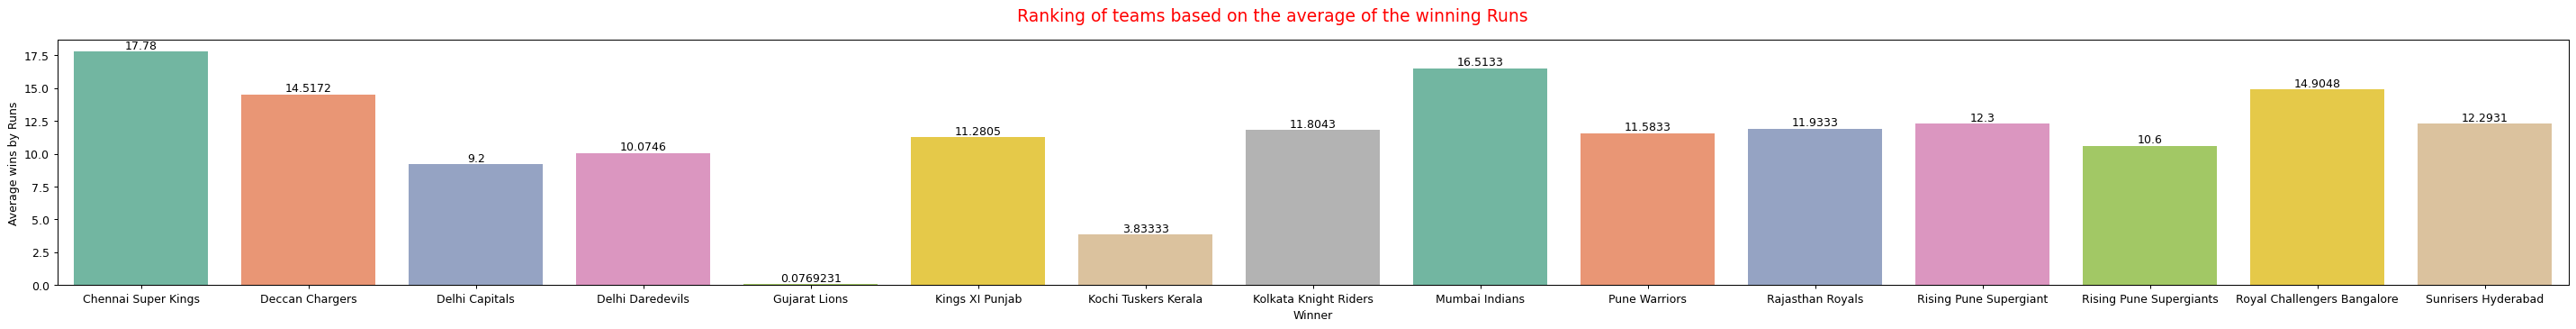

In [19]:
fig, ax = plt.subplots(figsize=(40,4), dpi=90)
sns.barplot(x='winner',y='win_by_runs',data=X,palette="Set2")
plt.xlabel('Winner')
plt.ylabel('Average wins by Runs')
ax.bar_label(ax.containers[0])

fig.suptitle('Ranking of teams based on the average of the winning Runs', fontsize=15, color = 'red');

C:\Users\DIVYA DEEPAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


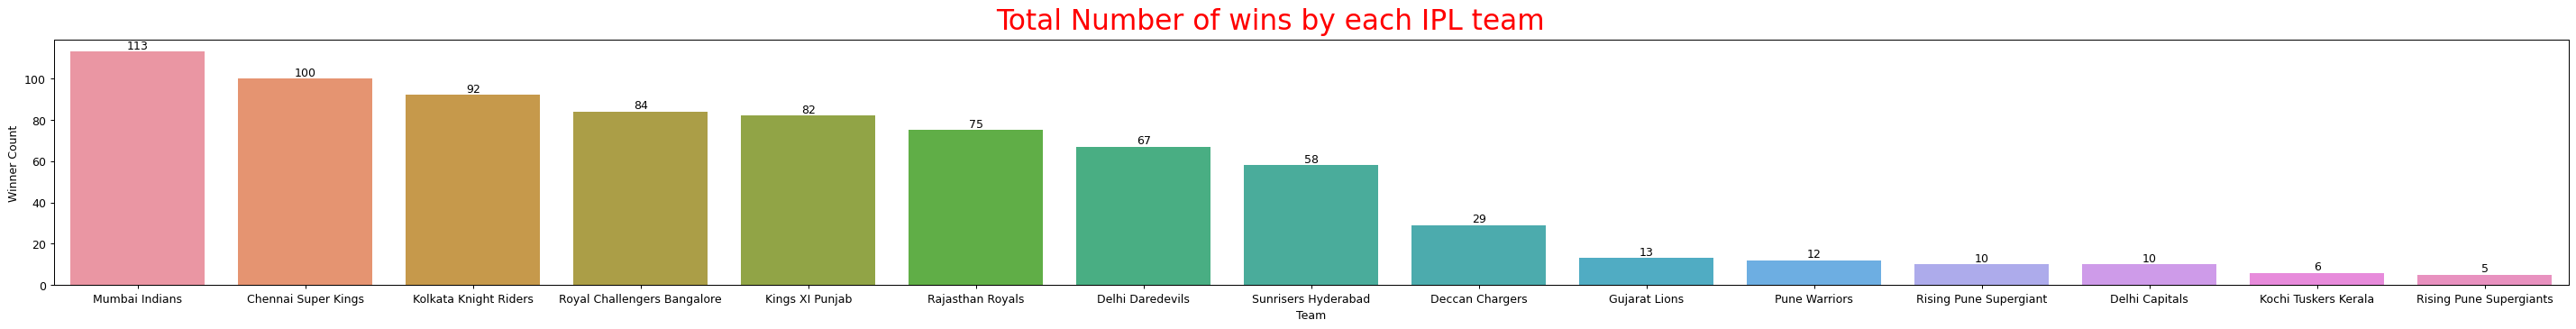

In [20]:
#total number of wins by each IPL team

wins=pd.DataFrame(data2['winner'].value_counts())
wins['name']=wins.index
fig, ax = plt.subplots(figsize=(40,4), dpi=90)
sns.barplot(wins['name'],wins['winner'])
plt.xlabel('Team')
plt.ylabel('Winner Count')
ax.bar_label(ax.containers[0])

fig.suptitle('Total Number of wins by each IPL team', fontsize=25, color = 'red')

C:\Users\DIVYA DEEPAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


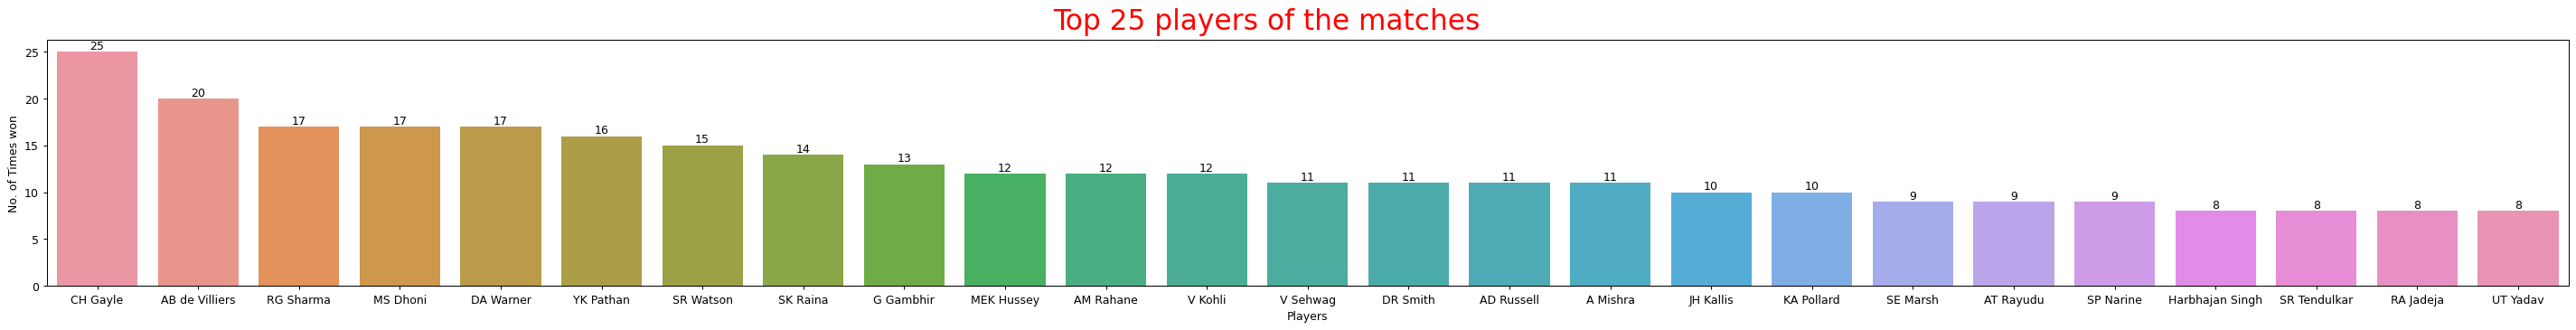

In [21]:
#top 25 players of matches

player=pd.DataFrame(data2['player_of_match'].value_counts())
player['names']=player.index
player=player.head(25)
fig, ax = plt.subplots(figsize=(40,4), dpi=90)
sns.barplot(player['names'],player['player_of_match'])
plt.xlabel('Players')
plt.ylabel('No. of Times won')
ax.bar_label(ax.containers[0])

fig.suptitle('Top 25 players of the matches', fontsize=25, color = 'red');

[Text(0, 0, '5434'),
 Text(0, 0, '5415'),
 Text(0, 0, '4914'),
 Text(0, 0, '4741'),
 Text(0, 0, '4632'),
 Text(0, 0, '4560'),
 Text(0, 0, '4477'),
 Text(0, 0, '4446'),
 Text(0, 0, '4428'),
 Text(0, 0, '4223')]

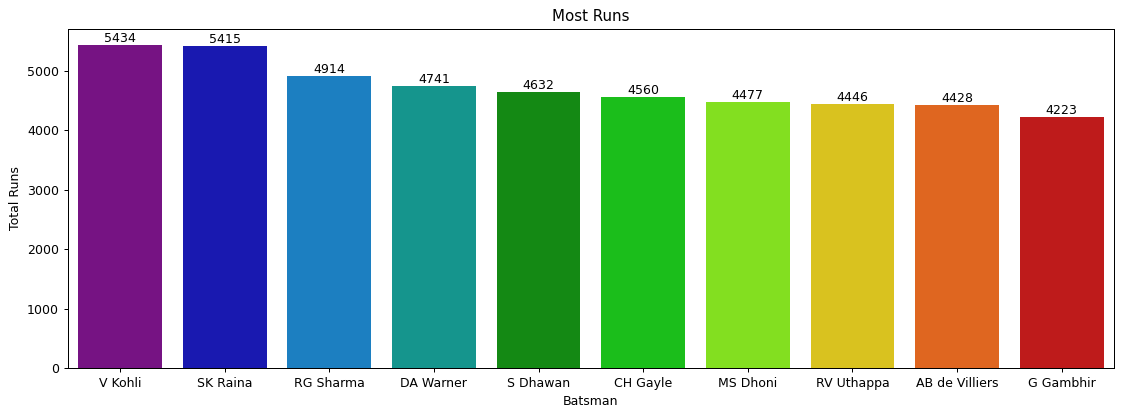

In [22]:
#Top 10 players who took most number of runs

runs = pd.DataFrame()
runs['Total Runs'] = data1.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(10)
runs.index.names = ['Batsman']
runs.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(15,5), dpi=90)
sns.barplot(x='Batsman',y='Total Runs',data = runs,palette='nipy_spectral')
plt.title('Most Runs')
ax.bar_label(ax.containers[0])

[Text(0, 0, '2.5'),
 Text(0, 0, '2.5'),
 Text(0, 0, '2.31579'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1.93333'),
 Text(0, 0, '1.90162'),
 Text(0, 0, '1.78261'),
 Text(0, 0, '1.77963'),
 Text(0, 0, '1.77596')]

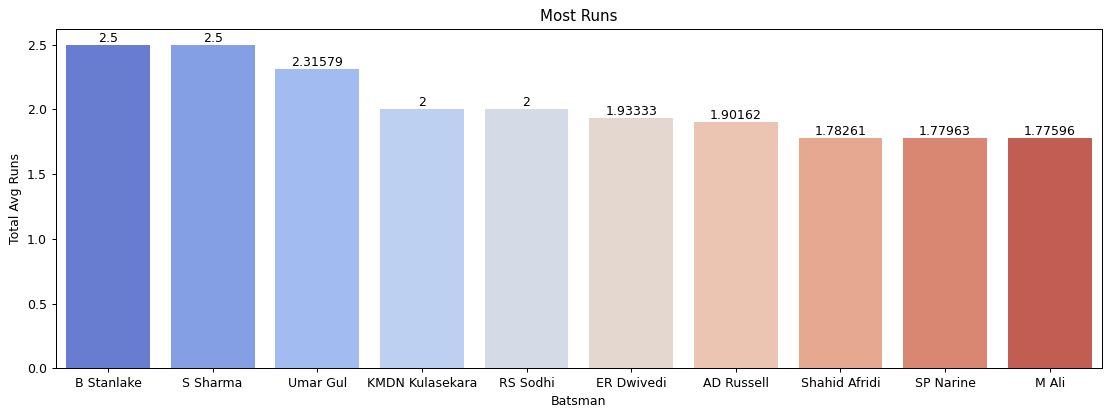

In [23]:
#Top 10 players with highest average runs

runs = pd.DataFrame()
runs['Total Avg Runs'] = data1.groupby('batsman').mean()['total_runs'].sort_values(ascending = False).head(10)
runs.index.names = ['Batsman']
runs.reset_index(inplace=True)
runs 

fig, ax = plt.subplots(figsize=(15,5), dpi=90)
sns.barplot(x='Batsman',y='Total Avg Runs',data = runs,palette='coolwarm')
plt.title('Most Runs')
ax.bar_label(ax.containers[0])

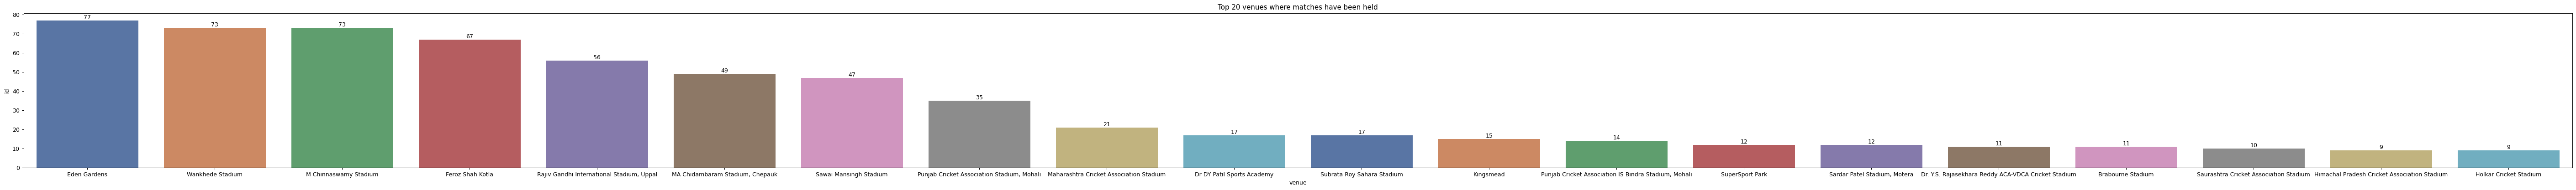

In [24]:
#Top 20 grounds the most number of matches have been held

venues = data2.groupby('venue').count()[['id']].sort_values(by='id',ascending=False).head(20)
ser = pd.DataFrame(venues['id']) 
ser.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(80,5), dpi=90)
sns.barplot(x='venue',y='id',data = ser,palette='deep')
plt.title('Top 20 venues where matches have been held')
for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:xlabel='season', ylabel='count'>

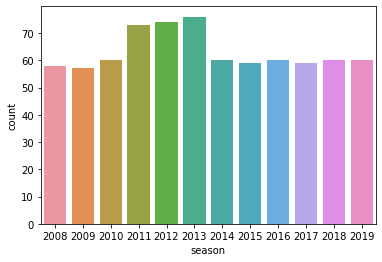

In [25]:
#Season which had most number of matches

sns.countplot(x='season', data=data2)

([<matplotlib.patches.Wedge at 0x233983020d0>,
 [Text(-0.10278308669352393, 1.6467955662709781, 'toss_winners_won'),
  Text(0.10278293250939459, -1.6467955758942183, 'toss_winners_lost')],
 [Text(-0.05606350183283123, 0.898252127056897, '51.98%'),
  Text(0.056063417732397036, -0.898252132305937, '48.02%')])

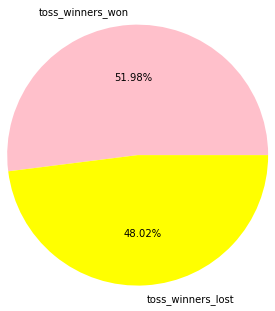

In [26]:
#Toss winning has helped the match win or not

won_data=0
for i in range(len(data2)):
    if(data2['toss_winner'][i] == data2['winner'][i]):
        won_data = won_data+1
won_data

labels=['toss_winners_won','toss_winners_lost']
colors=['pink','yellow']
plt.pie([won_data,len(data2)-won_data], labels=labels,autopct='%1.2f%%',colors=colors,radius=1.5)


C:\Users\DIVYA DEEPAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Grounds that have had most number of winning matches')

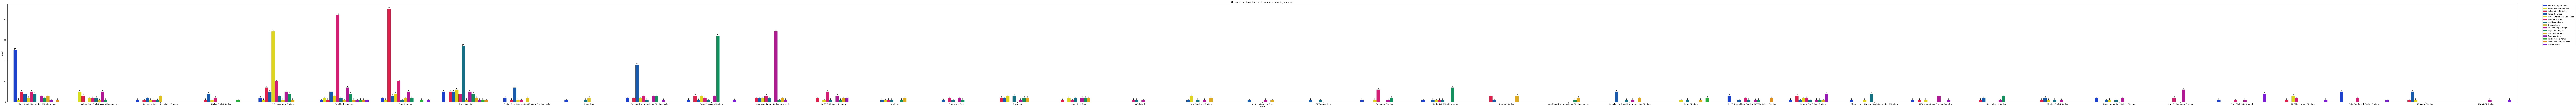

In [27]:
#grounds which have had total number of winning matches


fig, ax = plt.subplots(figsize=(250,10), dpi=90)
sns.countplot('venue',hue='winner', data=data2, palette='prism')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Grounds that have had most number of winning matches')

Text(0.5, 1.0, 'Different Types in which Dismissal took place')

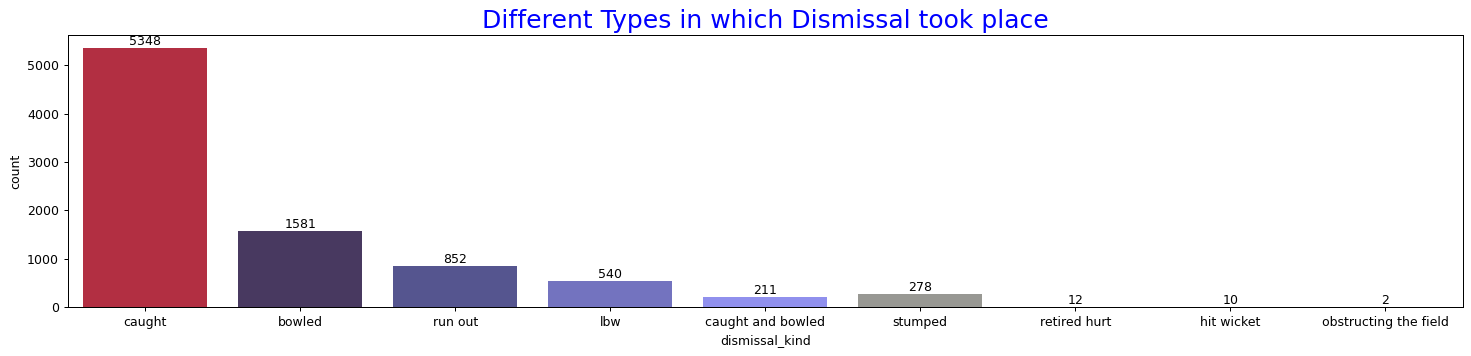

In [28]:
dismissed = data1['dismissal_kind'].unique()
dismissed
fig, ax = plt.subplots(figsize=(20,4), dpi=90)
sns.countplot(x='dismissal_kind',data=data1,palette='gist_stern')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Different Types in which Dismissal took place',fontsize=20,color='blue')

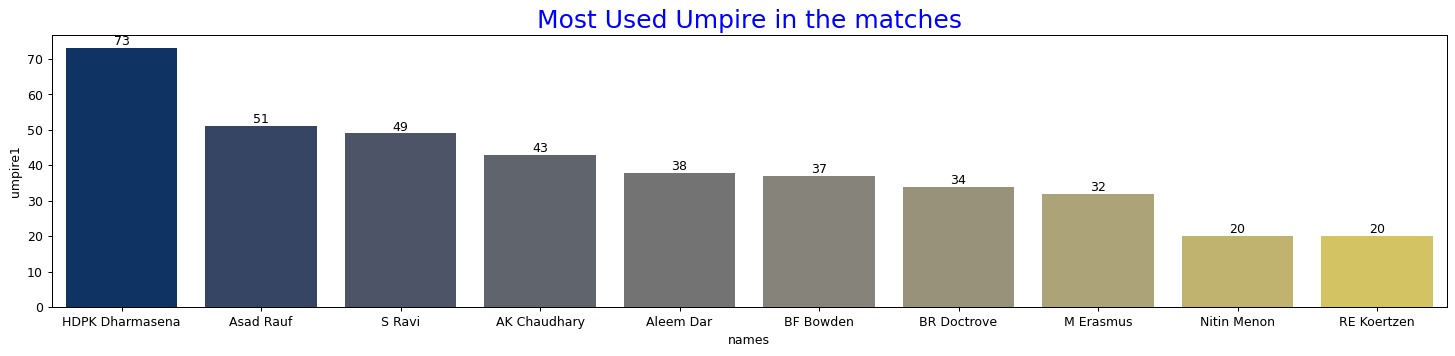

In [29]:
#most used umpire 

umpire = pd.DataFrame(data2['umpire1'].value_counts())
umpire['names']=umpire.index
umpire=umpire.head(10)
 

fig, ax = plt.subplots(figsize=(20,4), dpi=90)
sns.barplot(x='names',y='umpire1',data=umpire,palette='cividis')
plt.title('Most Used Umpire in the matches',fontsize=20,color='blue')
for i in ax.containers:
    ax.bar_label(i)

Text(0.5, 1.0, 'Most Used Umpire per Season')

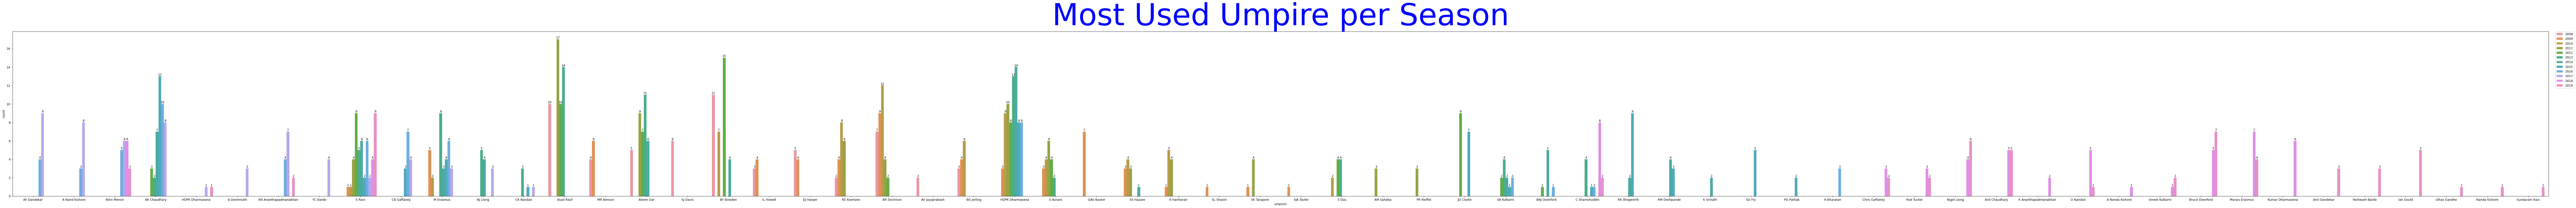

In [30]:
fig, ax = plt.subplots(figsize=(150,10), dpi=90)


sns.countplot(x='umpire1',hue='season',data=data2)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper right', borderaxespad=0)

for i in ax.containers:
    ax.bar_label(i)
plt.title('Most Used Umpire per Season',fontsize=100,color='blue')

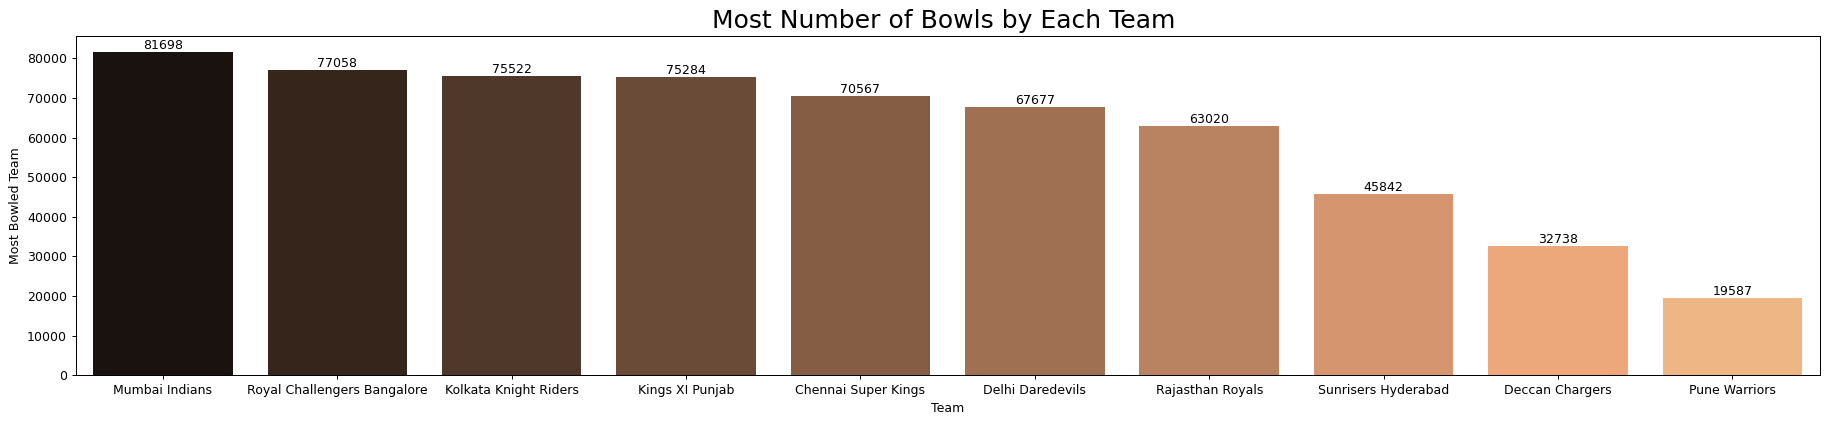

In [31]:
#most balls bowled by each team

bowls = pd.DataFrame()
bowls['Most Bowled Team'] = data1.groupby('bowling_team').sum()['ball'].sort_values(ascending = False).head(10)
bowls.index.names = ['Team']
bowls.reset_index(inplace=True)
bowls 

fig, ax = plt.subplots(figsize=(25,5), dpi=90)
sns.barplot(x='Team',y='Most Bowled Team',data = bowls,palette='copper')
plt.title('Most Number of Bowls by Each Team ',fontsize=20)
for i in ax.containers:
    ax.bar_label(i)

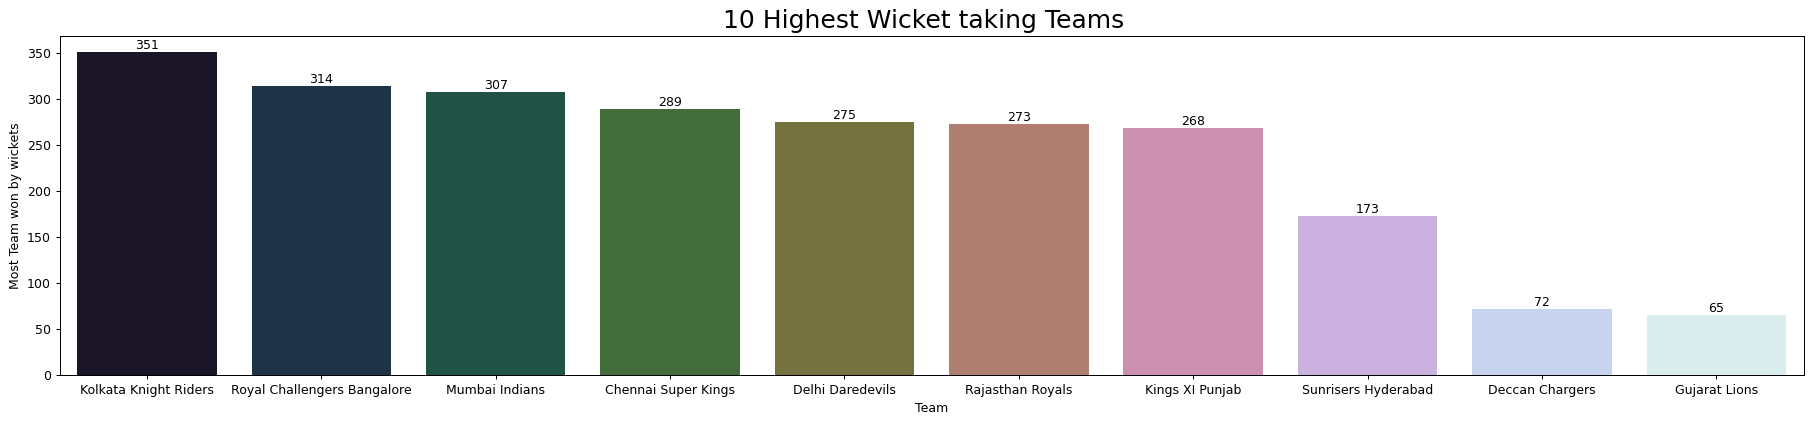

In [32]:
#10 Highest wicket-taking Team

wicket_won = pd.DataFrame()
wicket_won['Most Team won by wickets'] = data2.groupby('winner').sum()['win_by_wickets'].sort_values(ascending = False).head(10)
wicket_won.index.names = ['Team']
wicket_won.reset_index(inplace=True)
wicket_won 

fig, ax = plt.subplots(figsize=(25,5), dpi=90)
sns.barplot(x='Team',y='Most Team won by wickets',data = wicket_won,palette='cubehelix')
plt.title('10 Highest Wicket taking Teams  ',fontsize=20)
for i in ax.containers:
    ax.bar_label(i)

# Prediction of perfect Model 

In [33]:
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
data2.drop(['date'],axis=1,inplace=True)

In [36]:
data2.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin


In [37]:
le = LabelEncoder()
data2['city'] = le.fit_transform(data2['city'])
data2['team1'] = le.fit_transform(data2['team1'])
data2['team2'] = le.fit_transform(data2['team2'])
data2['toss_winner'] = le.fit_transform(data2['toss_winner'])
data2['toss_decision'] = le.fit_transform(data2['toss_decision'])

data2['result'] = le.fit_transform(data2['result'])
data2['winner'] = le.fit_transform(data2['winner'])
data2['player_of_match'] = le.fit_transform(data2['player_of_match'])
data2['venue'] = le.fit_transform(data2['venue'])
data2['umpire1'] = le.fit_transform(data2['umpire1'])
data2['umpire2'] = le.fit_transform(data2['umpire2'])


In [38]:
data2.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,14,14,13,13,1,1,0,14,35,0,224,28,6,35
1,2,2017,26,8,11,11,1,1,0,11,0,7,199,21,1,50
2,3,2017,28,4,7,7,1,1,0,7,0,10,34,31,39,17
3,4,2017,15,11,5,5,1,1,0,5,0,6,61,13,3,14
4,5,2017,2,13,3,13,0,1,0,13,15,0,99,17,23,15


In [39]:
x = data2.drop(['winner'],axis=1)
x

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,14,14,13,13,1,1,0,35,0,224,28,6,35
1,2,2017,26,8,11,11,1,1,0,0,7,199,21,1,50
2,3,2017,28,4,7,7,1,1,0,0,10,34,31,39,17
3,4,2017,15,11,5,5,1,1,0,0,6,61,13,3,14
4,5,2017,2,13,3,13,0,1,0,15,0,99,17,23,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,23,7,8,8,1,1,0,0,9,64,40,37,40
752,11412,2019,8,0,8,0,0,1,0,0,6,22,18,38,39
753,11413,2019,31,14,2,2,1,1,0,0,2,170,0,23,15
754,11414,2019,31,2,0,0,1,1,0,0,6,55,0,56,13


In [40]:
y = data2['winner']
y

0      14
1      11
2       7
3       5
4      13
       ..
751     8
752     8
753     2
754     0
755     8
Name: winner, Length: 756, dtype: int32

In [41]:
fold = StratifiedKFold(n_splits=4)
fold
fold.split(x,y)


<generator object _BaseKFold.split at 0x0000023397EC69E0>

In [42]:
def get_score(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

In [43]:
ls = []
rf = []
dt = []
svc = []
rfr = []
lir = []
dtr = []


In [44]:
for train_index,test_index in fold.split(x,y):
        xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
        #xtrain,xtest,ytrain,ytest = x[train_index],x[test_index],y[train_index],y[test_index]
        ls.append(get_score(LogisticRegression(),xtrain,xtest,ytrain,ytest))
        rf.append(get_score(RandomForestClassifier(),xtrain,xtest,ytrain,ytest))
        dt.append(get_score(DecisionTreeClassifier(),xtrain,xtest,ytrain,ytest))
        svc.append(get_score(SVC(),xtrain,xtest,ytrain,ytest))
        rfr.append(get_score(RandomForestRegressor(),xtrain,xtest,ytrain,ytest))
        lir.append(get_score(LinearRegression(),xtrain,xtest,ytrain,ytest))
        dtr.append(get_score(DecisionTreeRegressor(),xtrain,xtest,ytrain,ytest))

C:\Users\DIVYA DEEPAK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DIVYA DEEPAK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [45]:
ls

[0.0582010582010582,
 0.1693121693121693,
 0.1746031746031746,
 0.1164021164021164]

In [46]:
from statistics import mean

In [47]:
mean(ls)

0.12962962962962962

In [48]:
mean(dt)

0.7724867724867724

In [49]:
mean(rf)

0.6216931216931216

In [50]:
mean(svc)

0.1402116402116402

In [51]:
mean(rfr)

0.9426824766599389

In [52]:
mean(lir)

0.40784106390111097

In [53]:
mean(dtr)

0.8220147859447956

# Random forest regressor is the best model compared to others

In [54]:
model = RandomForestRegressor()

In [55]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [56]:
model.score(xtest,ytest)

0.9347817244173092

In [57]:
model.predict([[3,2017,28,4,7,7,1,1,0,0,10,34,31,39,17]])

C:\Users\DIVYA DEEPAK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.86])

# predicted output is accurate by 0.1%